<h2>Self Case Study on Mercedes-benz greener manufacturing explained </b></h2>

<h2>Business problem</h2>

<p>Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.</p>

<p>To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.</p>

<p>In this Case studhy we will reduce the time that cars spend on the test bench.</p>

In [0]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.utils import check_array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingRegressor
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LassoLarsCV
import warnings
from sklearn.svm import SVR
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import cross_validate
from google.colab import drive
import io,pickle

In [30]:
drive.mount('/content/gdrive')
train = pd.read_csv("/content/gdrive/My Drive/SelfCaseStudy/train/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/SelfCaseStudy/test/test.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


<h2>1.Data Exploration</h2>

<h3>1.1. Checking for Y values range :</h3>

In [0]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


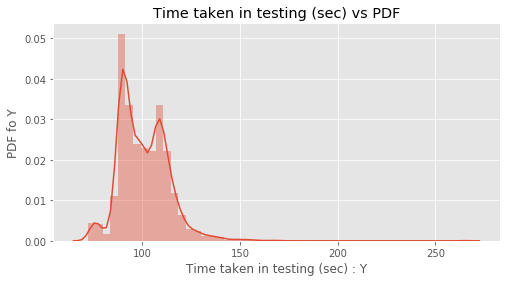

In [0]:
# Cheking for Y values range : 
plt.figure(figsize=(8,4))
plt.title("Time taken in testing (sec) vs PDF")
sns.distplot(train["y"])
plt.xlabel("Time taken in testing (sec) : Y")
plt.ylabel("PDF fo Y")
plt.show()

In [0]:
# Lets check how many points after 150 sec
import numpy as np
def percentile_(start,end,step):
    for i in range(start,end,step):
        print(f"{i}% percentile point :  {np.percentile(train['y'],i)}")
print("#"*18 + "Summary" + "#"*18)
percentile_(0,101,10)
print("#"*40)
percentile_(90,101,1)
print(f"Total points after 150 sec are  : {len([i for i in train['y'] if i > 150])}")
print("#"*40)
print(f"Points are a follow  : \n{[i for i in train['y'] if i > 150]}")



##################Summary##################
0% percentile point :  72.11
10% percentile point :  88.07
20% percentile point :  89.96
30% percentile point :  91.91
40% percentile point :  94.84
50% percentile point :  99.15
60% percentile point :  103.77
70% percentile point :  107.766
80% percentile point :  110.594
90% percentile point :  115.25
100% percentile point :  265.32
########################################
90% percentile point :  115.25
91% percentile point :  116.0484
92% percentile point :  116.89160000000001
93% percentile point :  118.0376
94% percentile point :  119.056
95% percentile point :  120.80600000000001
96% percentile point :  122.4
97% percentile point :  125.89319999999998
98% percentile point :  129.2992
99% percentile point :  137.4304
100% percentile point :  265.32
Total points after 150 sec are  : 15
########################################
Points are a follow  : 
[150.43, 169.91, 154.87, 265.32, 158.53, 154.43, 160.87, 150.89, 152.32, 167.45, 154.16, 1

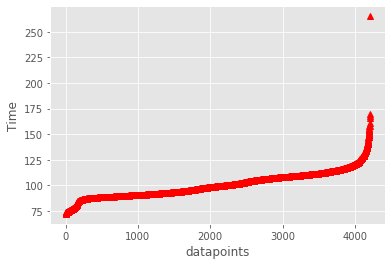

In [0]:
plt.plot(sorted(train['y']),'r^')
plt.xlabel("datapoints")
plt.ylabel("Time")
plt.show()

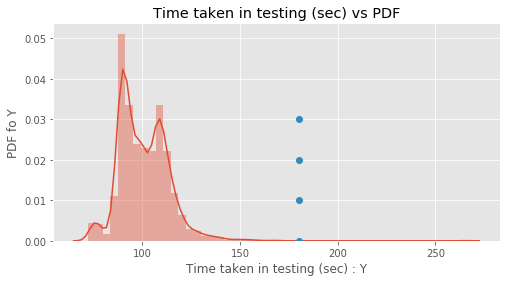

In [0]:
# We will clip Y values after 150 sec so that outliers will not affect our result that much.
plt.figure(figsize=(8,4))
plt.title("Time taken in testing (sec) vs PDF")
sns.distplot(train["y"])
plt.xlabel("Time taken in testing (sec) : Y")
plt.ylabel("PDF fo Y")
plt.plot([180,180,180,180],[0,.01,.02,.03],'o')
plt.show()

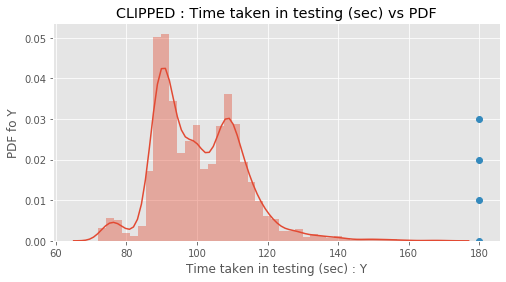

In [0]:
plt.figure(figsize=(8,4))
clipped_y = []
[clipped_y.append(130) if i>180 else clipped_y.append(i) for i in train['y']]
# We will clip Y values after 150 sec so that outliers will not affect our result that much.
plt.title("CLIPPED : Time taken in testing (sec) vs PDF")
sns.distplot(clipped_y)
plt.xlabel("Time taken in testing (sec) : Y")
plt.ylabel("PDF fo Y")
plt.plot([180,180,180,180],[0,.01,.02,.03],'o')
plt.show()

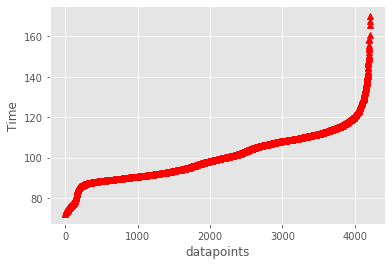

In [0]:
train['y'] = clipped_y
plt.plot(sorted(train['y']),'r^')
plt.xlabel("datapoints")
plt.ylabel("Time")
plt.show()

In [0]:
# Lets check how many points after 150 sec
import numpy as np
def percentile_(start,end,step):
    for i in range(start,end,step):
        print(f"{i}% percentile point :  {np.percentile(clipped_y,i)}")
print("#"*18 + "Summary" + "#"*18)
print(f"Total points after 180 sec are  : {len([i for i in clipped_y if i > 180])}")
print("#"*40)
print(f"Points are a follow  : \n{[i for i in clipped_y if i > 180]}")

##################Summary##################
Total points after 180 sec are  : 0
########################################
Points are a follow  : 
[]


<h3>1.2. Checking for catagorical features Features :</h3>
<p>We have 8 catagorical : ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'] , remaining all binary</p>
<p><b>1.2.1. Bar graphs</p>

In [0]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [0]:
for key,value  in train.columns.to_series().groupby(train.dtypes).groups.items():
    if key == 'O':
        print("Catagorical features : ",value)

Catagorical features :  Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [0]:
Categorcial_dict = {}
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    Categorcial_dict.update({i : len(train[i].value_counts())})

<Figure size 576x288 with 0 Axes>

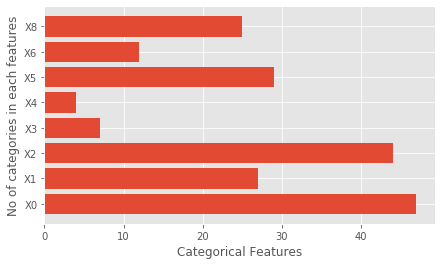

Total catagories in train data : 195


In [0]:
# plt.style.available
plt.figure(figsize=(8,4))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,4))
plt.barh(list(Categorcial_dict.keys()) , list(Categorcial_dict.values()), animated = 1)
# df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Categorical Features')
ax.set_ylabel('No of categories in each features')
plt.show()
print(f"Total catagories in train data : {sum(Categorcial_dict.values())}")

<p><b>1.2.2. Violin plot for catagorical features</p>

In [0]:
def Boxplot(feature_name): 
    plt.style.use('seaborn-poster')
    plt.figure(figsize=(16,6))
    sns.boxplot(y='y', x=feature_name, data=train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y']])
    plt.ylabel("Clipped y under 180")
    return plt

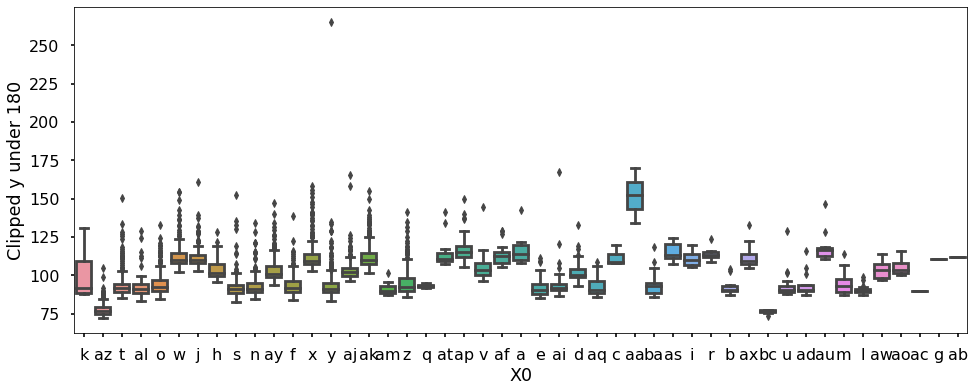

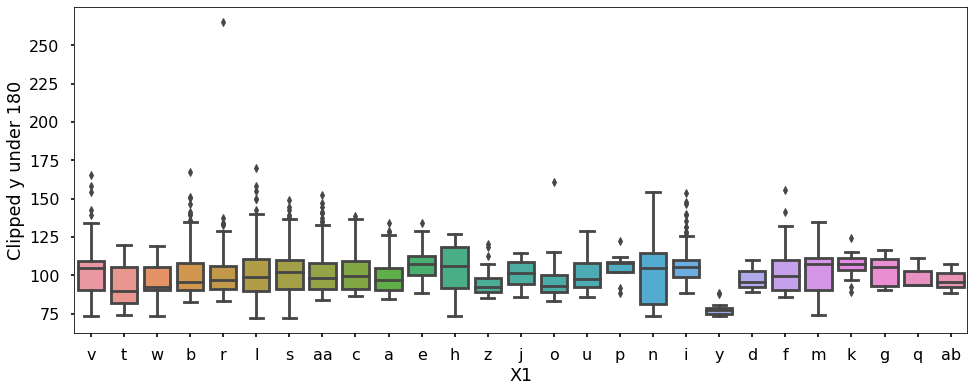

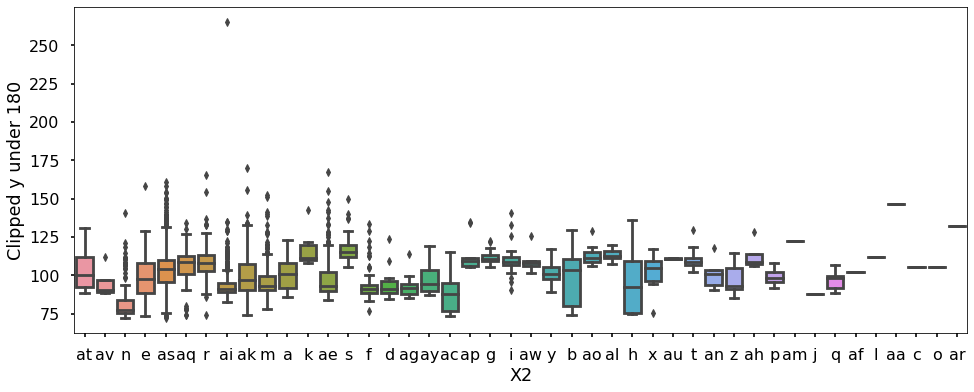

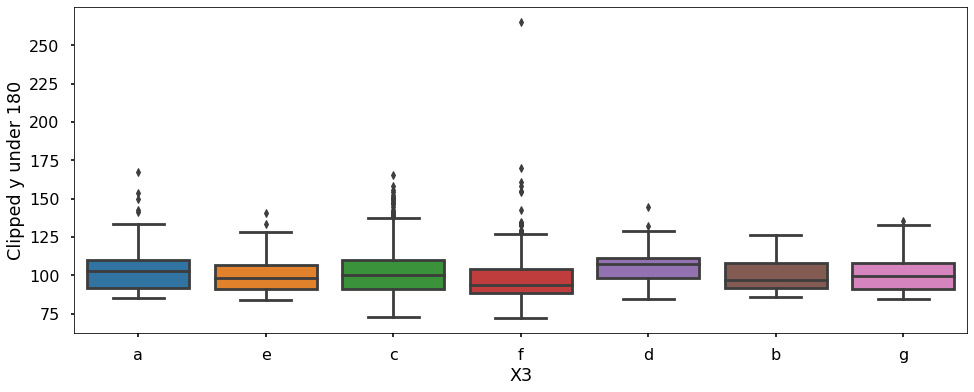

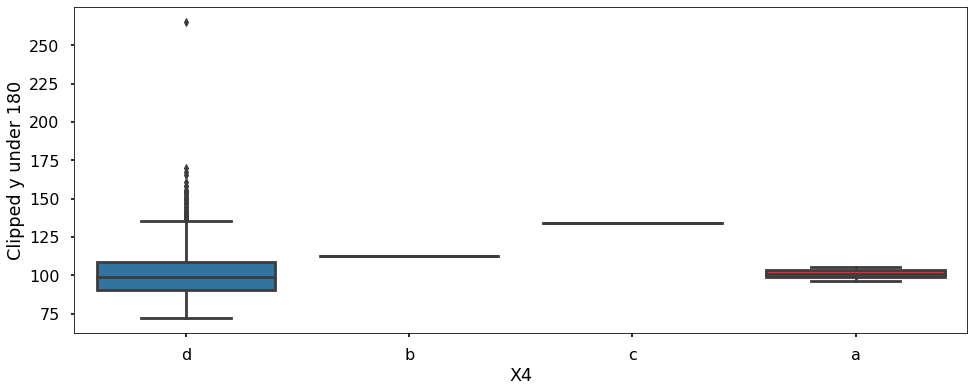

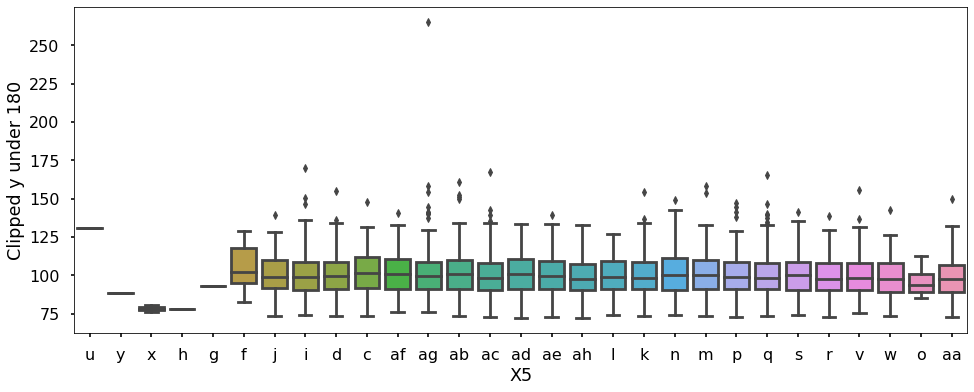

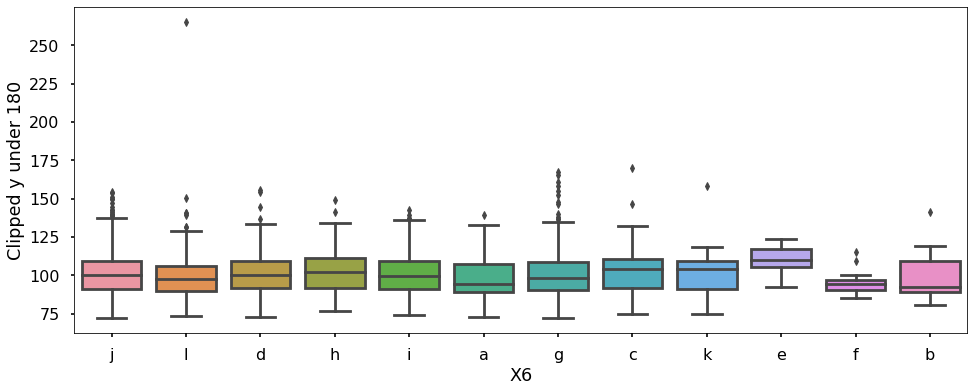

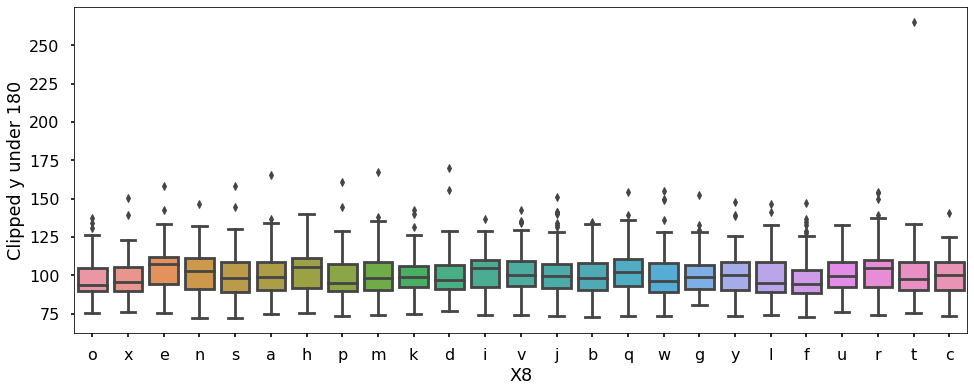

In [0]:
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    plot =  Boxplot(i)
    plot.show()

<p><b><u>Summary</u> : Observations from above catagorical plots</p>

<p><b>0. Above box plot show each catagory of feature's quantile range w.r.t (Y)</p></br>
<p><b>1. X0 and X2 contain more than 40 catagories </p></br>
<p><b>2. X0, X2, X5 contain more number of outliers </p></br>
<p><b>3. X3 conatinas less noise but not well seprated box plots </p></br>
<p><b>4. X3, X4 contains less than 8 catagories </p></br>
<p><b>5. In X4 most of the datapoints is of "d" catagory</p></br>
<p><b>6. From above we can't say that which is very good in prediciting Y value, By seeing thing i get the idea to use either forward featiure selection or correlation factor with Y(Pearson correlation)</p></br>
<p><b>7. In dependent variable Y, we can see one outlier i.e 238.5, We can impute this value with Mean of Y (Note : After testing got to know that 130 is the best value))</p></br>

<h3><b>1.3. Plot for Binnary features</h3>

In [0]:
catagorical_features = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y','ID']
binnary_features = [i for i in train.columns.tolist() if i not in catagorical_features]

In [0]:
bar_dict_0 = dict()
bar_dict_1 = dict()
for i in binnary_features:
    bar_dict_0.update({i : list(train[i].value_counts().reset_index().iloc[0])[1] })
    
for i in binnary_features:
    if (len(list(train[i].value_counts())) == 1):
        bar_dict_1.update({i : 0})
    else:
        bar_dict_1.update({i : list(train[i].value_counts().reset_index().iloc[1])[1] })    

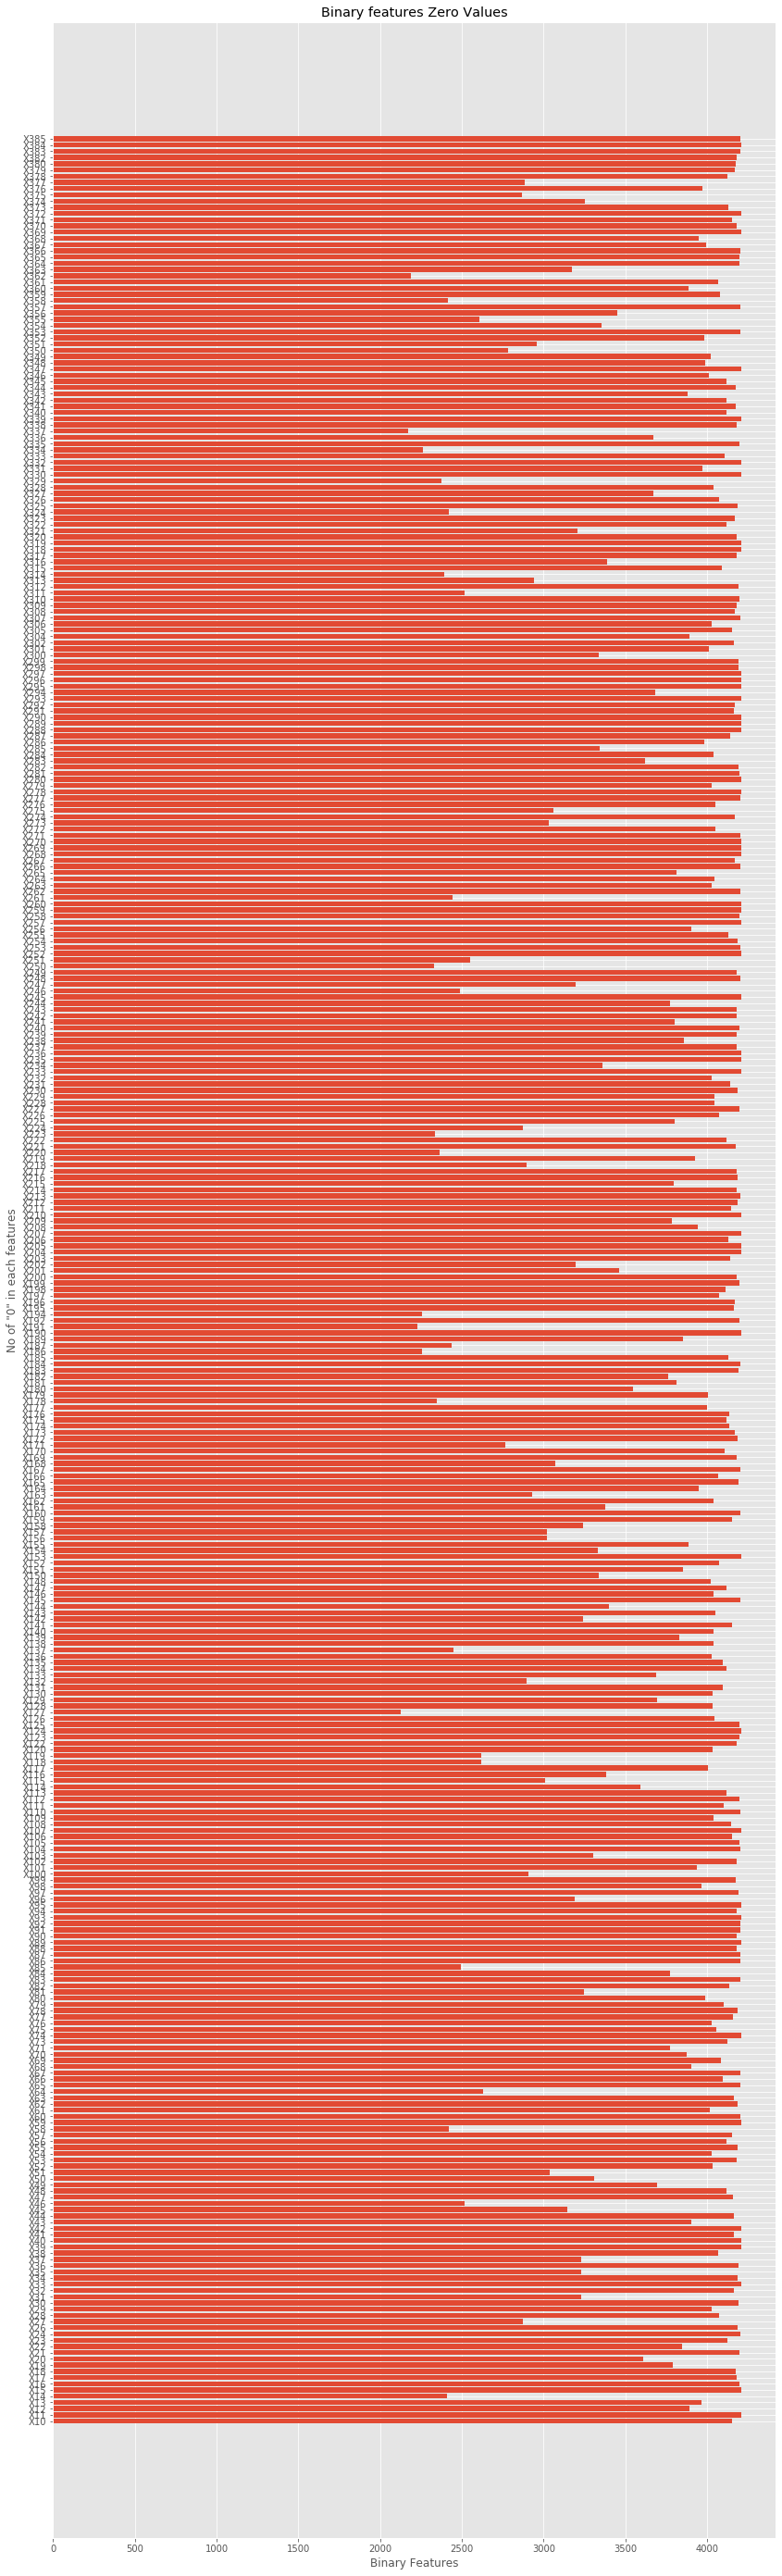

In [0]:
# plt.style.available
# plt.figure(figsize=(16,8))

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,50))
plt.barh(list(bar_dict_0.keys()) , list(bar_dict_0.values()))
# df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Binary Features')
ax.set_ylabel('No of "0" in each features')
plt.title("Binary features Zero Values")
plt.show()

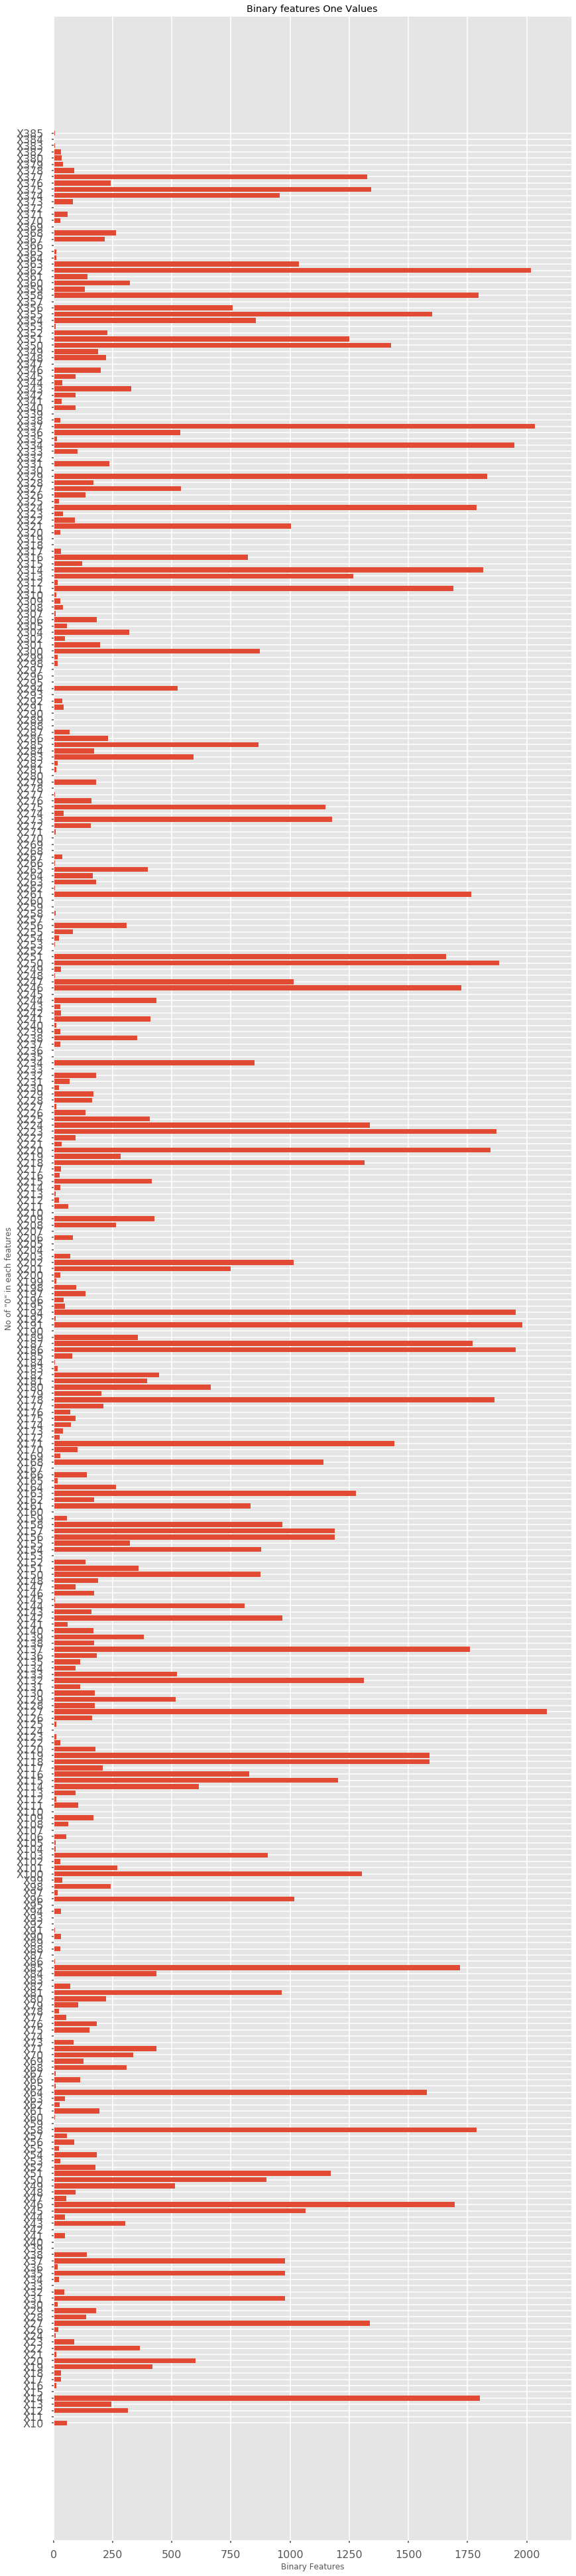

In [0]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14,70))
plt.barh(list(bar_dict_1.keys()) , list(bar_dict_1.values()))
# df.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Binary Features')
ax.set_ylabel('No of "0" in each features')
plt.title("Binary features One Values")
plt.show()

In [0]:
Total_one = len(bar_dict_1.values())
Lessthan_10 = len([i for i in bar_dict_1.values() if i==0])
print(f"Percentage of binary features which contain less one values {Lessthan_10*100/Total_one}%")

Percentage of binary features which contain less one values 3.260869565217391%


In [0]:
All_zeroes = [i for i,k in bar_dict_1.items() if k==0]
print(All_zeroes)
'''All zero coloumns are above and it's good to remove these features as they are not adding that much importance to the Y value :'''


['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


"All zero coloumns are above and it's good to remove these features as they are not adding that much importance to the Y value :"

<h3><b>1.4. Correlation between independent features and dependent features(pearson correlation)</h3>

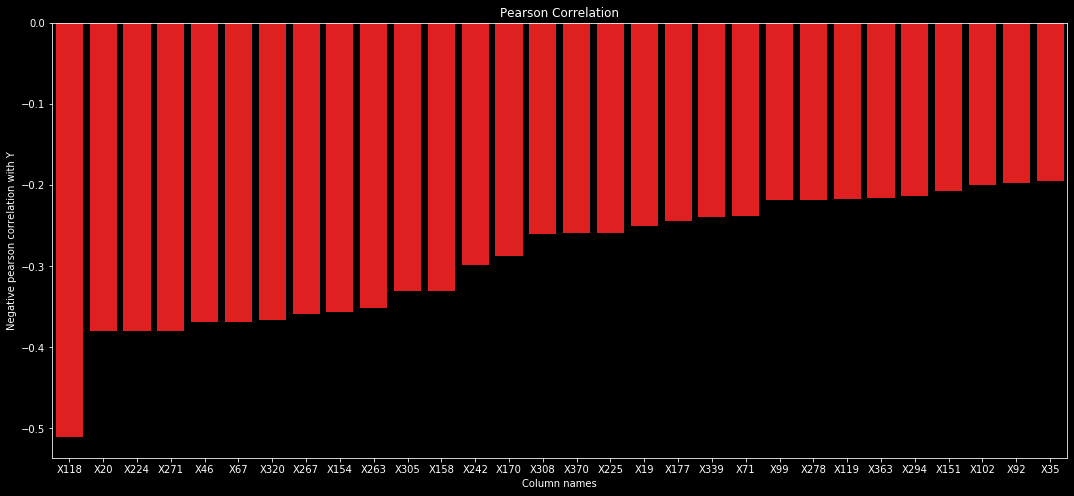

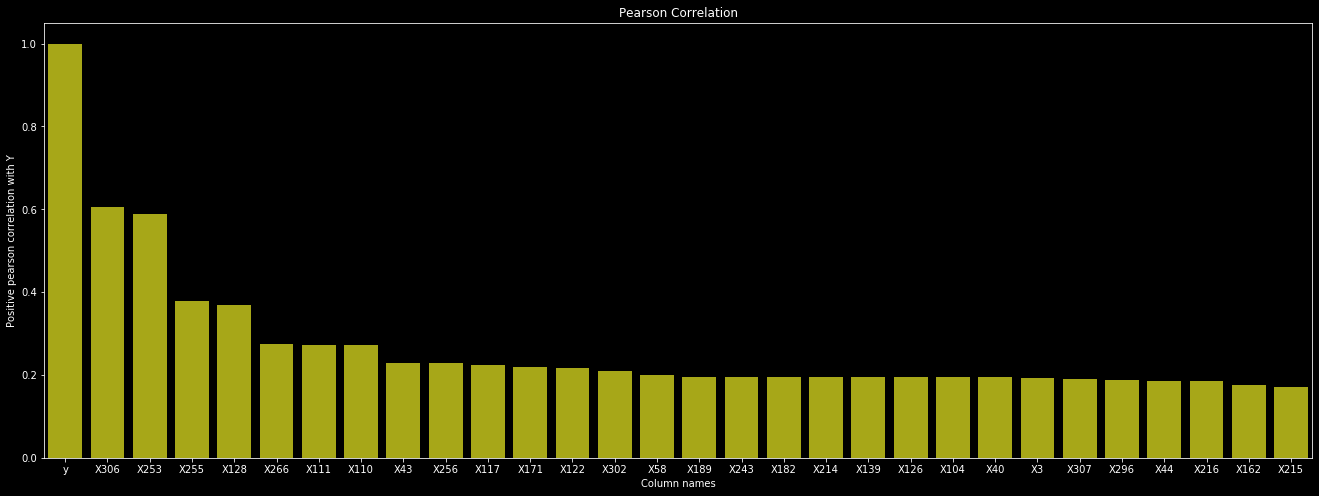

In [0]:
from scipy.stats import pearsonr
Correlation = train.corr()
Correlation = pd.DataFrame(Correlation['y'] )
Correlation.dropna(inplace=True,axis=0)
Zero_correlation = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

zipped = zip([i for i in train.columns if i not in Zero_correlation],[i[0] for i in Correlation.values.tolist()])
# Using sorted and lambda 
res = sorted(zipped, key = lambda x: x[1])

plt.style.use('dark_background')
plt.figure(figsize=(40,8))
plt.subplot(1,2,1)
sns.barplot([i[0] for i in res][:30],[i[1] for i in res][:30],color = 'r')
plt.xlabel("Column names")
plt.ylabel("Negative pearson correlation with Y")
plt.title("Pearson Correlation")
plt.show()

plt.figure(figsize=(50,8))
plt.subplot(1,2,2)
sns.barplot([i[0] for i in res][::-1][:30],[i[1] for i in res][::-1][:30],color = 'y')
plt.xlabel("Column names")
plt.ylabel("Positive pearson correlation with Y")
plt.title("Pearson Correlation")
plt.show() 

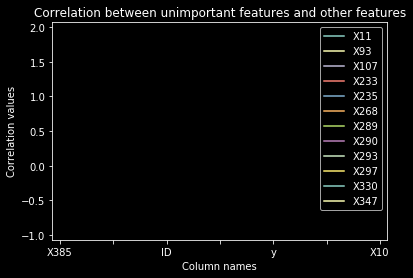

In [0]:
Correlation = train.corr()
Correlation = Correlation[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']]
Correlation.plot()
plt.title("Correlation between unimportant features and other features")
plt.xlabel("Column names")
plt.ylabel("Correlation values")
plt.show()

<p><b>1.4.1. Summary : Observations from above Correlation plots</p>

<p>1. Only 1 catagorical feature X3 has correlation in top 30. </p>
<p>2. By looking from the plot i noticed that we have 12 zero correlation features which has only single binary value it. we can try to remove these features and see if it increase our performance.  </p>
<p>3. No intercorrelation also i have noticed from the above plot for features 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'  </p>

<h3>2. Data Cleaning</h3>

In [0]:
# Clipping fo our y values till 150
clipped_y  =[]
[clipped_y.append(130) if i>180 else clipped_y.append(i) for i in train['y']]
train['y'] = clipped_y

actual_y = train["y"]
train.drop("y",inplace=True,axis=1) 

<h3>3. Data pre-processing</h3>

In [32]:
def OneHot_encoding_function(train,test):
    for c in tqdm(train.columns):
        if train[c].dtype == 'object':
            lbl = OneHotEncoder()
            lbl.fit(np.array(train[c].values).reshape(-1, 1).tolist() + np.array(test[c].values).reshape(-1, 1).tolist())
            Encoded_category = lbl.transform(np.array(train[c].values).reshape(-1, 1))
            train.drop(c,inplace = True,axis = 1)
            columns_ = []
            for i in range(Encoded_category.shape[1]):
                columns_.append(c +"_" +str(i))
            train = pd.concat([train, pd.DataFrame(Encoded_category.toarray(),columns=columns_)], axis=1, sort=False)
            
            Encoded_category = lbl.transform(np.array(test[c].values).reshape(-1, 1))
            columns_ = []
            for i in range(Encoded_category.shape[1]):
                columns_.append(c +"_" +str(i))
            test.drop(c,inplace = True,axis = 1)
            test = pd.concat([test, pd.DataFrame(Encoded_category.toarray(),columns=columns_)], axis=1, sort=False)
            
    return [train,test]

def Label_encoding_function(train,test):
    for c in tqdm(train.columns):
        if c in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
            lbl = LabelEncoder()
            lbl.fit(list(train[c].values)+ list(test[c].values))
            train[c] = lbl.transform(list(train[c].values))
            test[c] = lbl.transform(list(test[c].values))
    return [train,test]

b = Label_encoding_function(train,test)
train = b[0]
test = b[1]

100%|██████████| 377/377 [00:00<00:00, 9900.34it/s]


<h3>4. Data Decomposition</h3>

In [0]:
def Decomposition_explained_variance(title,variance):
    plt.figure(figsize=(6,4))
    plt.title(title)
    X = [i for i in range(1,200)]
    plt.plot(X,variance)
    plt.axvline(x=12,color = 'r',dash_capstyle = 'round')
    plt.xlabel("Eigen Vectors")
    plt.ylabel("Explained variance")
    return plt

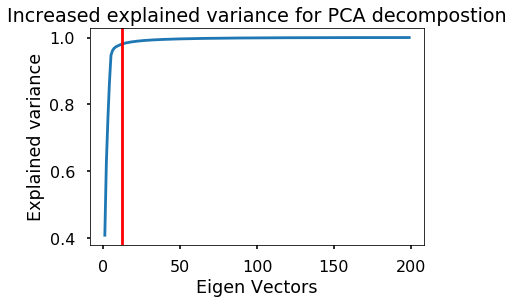

In [0]:
PCA_variance = []
for i in range(1,200):
    pca = PCA(n_components=i, random_state=420)
    pca2_results_train = pca.fit_transform(train.drop(['ID'], axis=1))
    PCA_variance.append(pca.explained_variance_ratio_.sum())
plotting = Decomposition_explained_variance("Increased explained variance for PCA decompostion",PCA_variance)
plotting.show()

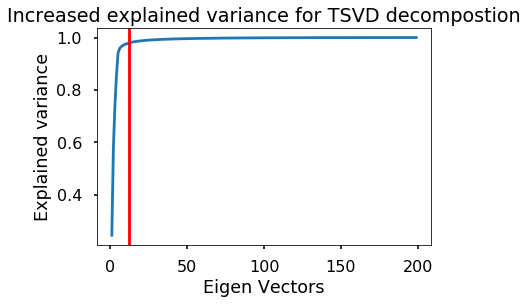

In [0]:
SVD_variance = []
for i in range(1,200):
    tsvd = TruncatedSVD(n_components=i, random_state=420)
    tsvd_results_train = tsvd.fit_transform(train.drop(['ID'], axis=1))
    SVD_variance.append(tsvd.explained_variance_ratio_.sum())
plotting = Decomposition_explained_variance("Increased explained variance for TSVD decompostion",SVD_variance)
plotting.show()

In [33]:
import copy
# from above plot we are taking 12 n_components
n_comp = 12

def decomposed_features(train_,test_):
    """
     This function is used to decomposed the features into lower dimensions by using different 
     dimnesional reduction techniques.
     1) TSVD
     2) PCA
     3) ICA
     4) GRP
     5) SRP  
    """
    # tSVD
    tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
    tsvd_results_train = tsvd.fit_transform(train_)
    tsvd_results_test = tsvd.transform(test_)

    # PCA
    pca = PCA(n_components=n_comp, random_state=420)
    pca2_results_train = pca.fit_transform(train_)
    pca2_results_test = pca.transform(test_)

    # ICA
    ica = FastICA(n_components=n_comp, random_state=420)
    ica2_results_train = ica.fit_transform(train_)
    ica2_results_test = ica.transform(test_)

    # GRP
    grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
    grp_results_train = grp.fit_transform(train_)
    grp_results_test = grp.transform(test_)

    # SRP
    srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
    srp_results_train = srp.fit_transform(train_)
    srp_results_test = srp.transform(test_)                                

    #save columns list before adding the decomposition components

    usable_columns = list(set(train_.columns) - set(['y']))

    # Append decomposition components to datasets
    for i in range(1, n_comp + 1):
        #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data) 
        train_['pca_' + str(i)] = pca2_results_train[:, i - 1]
        #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data
        test_['pca_' + str(i)] = pca2_results_test[:, i - 1]
         #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data
        train_['ica_' + str(i)] = ica2_results_train[:, i - 1]
        #below code is used to add the resultant decomposed features vertically(i.e we added 12 more coloumn in our original data
        test_['ica_' + str(i)] = ica2_results_test[:, i - 1]

        train_['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
        test_['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

        train_['grp_' + str(i)] = grp_results_train[:, i - 1]
        test_['grp_' + str(i)] = grp_results_test[:, i - 1]

        train_['srp_' + str(i)] = srp_results_train[:, i - 1]
        test_['srp_' + str(i)] = srp_results_test[:, i - 1]
    return [train_,test_]
# we are creating a deep copy in the memory one: 
# 1) original features 
# 2)other are original+decomposed features
decomposed_train = copy.deepcopy(train)
decomposed_test= copy.deepcopy(test)
decomposed_train,decomposed_test = decomposed_features(decomposed_train,decomposed_test)# This function is created above

# fixing coloum datatype
columns = train.columns
train[columns] = train[columns].apply(pd.to_numeric)
test[columns] = test[columns].apply(pd.to_numeric)

print(f"Train value : {train.shape}")
print(f"Train value : {test.shape}")

Train value : (4209, 377)
Train value : (4209, 377)


<h3>5. Machine Learning Model Architecture</h3>
<img src = "./Image.PNG" ></img>

<p><font color="red"><b>NOTE</b> : What we will do we will use <b>R^2</b> value to measure our stacked models and  we will be using <b>RMSE</b> so that it will bring more generalization into our final model and make our model robust!</font></p>

<h3>5.1 All features models</h3>

<h4>5.1.1 Linear Regression with ridge</h4>
<h4>5.1.2 Linear Regression with Lasso</h4>
<h4>5.1.3 Linear Regression with Elsatic net</h4>
<h4>5.1.4 Linear Regression with LARSLasso</h4>
<h4>5.1.5 Decision tree with Elsatic net</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:22<00:00,  1.67s/it]


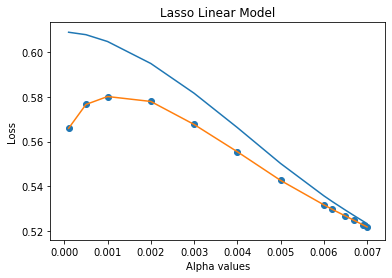

R_square for train data is : 0.5338931362108341
RMSE for train data is : 8.521223089352684


In [0]:

alpha = [.0001,.0005,.001,.002,.003,.004,.005,.006,.0062,.0065,.0067,.0069,.007] 
train_scores = []
test_scores = []
alpha_values = []
for i_alpha in tqdm(alpha):
    linear_clf = Lasso(alpha=i_alpha, fit_intercept=True, normalize=True,random_state=23)

    Scores = cross_validate(linear_clf, train, actual_y, cv=30,scoring=('r2'),\
                            return_train_score=True)
    train_scores.append(np.mean(Scores['train_score']))
    test_scores.append(np.mean(Scores['test_score']))
    alpha_values.append(i_alpha)
plt.title("Lasso Linear Model")
plt.plot(alpha_values,train_scores)
plt.plot(alpha_values,test_scores)
plt.scatter(alpha_values,test_scores)
plt.xlabel("Alpha values")
plt.ylabel("Loss")
plt.show()
    
linear_clf = Lasso(alpha=.006, fit_intercept=True, normalize=True, max_iter=100,random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

<h4>5.1.1 Linear Regression with ridge</h4>

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:32<00:00,  1.71s/it]


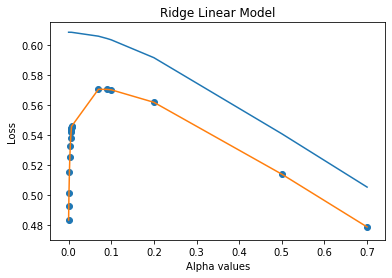

R_square for train data is : 0.5911882678744991
RMSE for train data is : 7.980330205158675


In [0]:

alpha = [.0001,.0005,.001,.002,.003,.004,.005,.006,.0062,.0065,.0067,.0069,.007,.07,.09,.1,.2,.5,.7] 
train_scores = []
test_scores = []
alpha_values = []
for i_alpha in tqdm(alpha):
    linear_clf = Ridge(alpha=i_alpha, fit_intercept=True, normalize=True,random_state=23)

    Scores = cross_validate(linear_clf, train, actual_y, cv=30,scoring=('r2'),\
                            return_train_score=True)
    train_scores.append(np.mean(Scores['train_score']))
    test_scores.append(np.mean(Scores['test_score']))
    alpha_values.append(i_alpha)
plt.title("Ridge Linear Model")
plt.plot(alpha_values,train_scores)
plt.plot(alpha_values,test_scores)
plt.scatter(alpha_values,test_scores)
plt.xlabel("Alpha values")
plt.ylabel("Loss")
plt.show()


    
linear_clf = Ridge(alpha=.2, fit_intercept=True, normalize=True, max_iter=100,\
                            random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

<h4>5.1.3 Linear Regression with Elsatic net</h4>

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.62s/it]


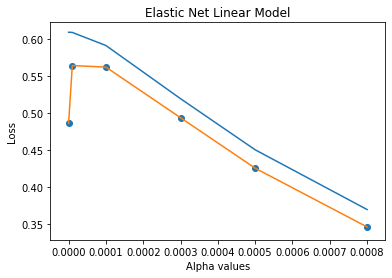

R_square for train data is : 0.5892936061548403
RMSE for train data is : 7.998801480297934


In [0]:

alpha = [.0000001,.00001,.0001,.0003,.0005,.0008] 
train_scores = []
test_scores = []
alpha_values = []
for i_alpha in tqdm(alpha):
    linear_clf = ElasticNet(alpha=i_alpha, fit_intercept=True, normalize=True,random_state=23)

    Scores = cross_validate(linear_clf, train, actual_y, cv=30,scoring=('r2'),\
                            return_train_score=True)
    train_scores.append(np.mean(Scores['train_score']))
    test_scores.append(np.mean(Scores['test_score']))
    alpha_values.append(i_alpha)
plt.title("Elastic Net Linear Model")
plt.plot(alpha_values,train_scores)
plt.plot(alpha_values,test_scores)
plt.scatter(alpha_values,test_scores)
plt.xlabel("Alpha values")
plt.ylabel("Loss")
plt.show()


    
linear_clf = ElasticNet(alpha=.0001, fit_intercept=True, normalize=True, max_iter=100,\
                            random_state=23) 
linear_clf.fit(train,actual_y)
r_square = r2_score(actual_y,linear_clf.predict(train))
RMSE = mean_squared_error(actual_y,linear_clf.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

<h4>5.1.5 Decision tree</h4>

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


params no 0 : {'min_samples_split': 9, 'max_leaf_nodes': 15, 'max_depth': 10, 'criterion': 'mae'} test score : [0.5600646700206695]
params no 1 : {'min_samples_split': 7, 'max_leaf_nodes': 500, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5600646700206695, 0.5239334870823943]
params no 2 : {'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_depth': 9, 'criterion': 'friedman_mse'} test score : [0.5600646700206695, 0.5239334870823943, -0.7457280111599782]
params no 3 : {'min_samples_split': 5, 'max_leaf_nodes': 300, 'max_depth': 7, 'criterion': 'mae'} test score : [0.5600646700206695, 0.5239334870823943, -0.7457280111599782, 0.5412633018694525]
params no 4 : {'min_samples_split': 4, 'max_leaf_nodes': 100, 'max_depth': 9, 'criterion': 'mae'} test score : [0.5600646700206695, 0.5239334870823943, -0.7457280111599782, 0.5412633018694525, 0.5086415415332031]
params no 5 : {'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_depth': 3, 'criterion': 'friedman_mse'} test score : [0.5600646

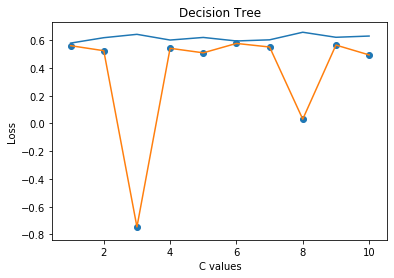

R_square for train data is : 0.6096784350214859
RMSE for train data is : 7.79777068694586


In [0]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree_params = {
    'criterion': ["mse", "friedman_mse", "mae"], 
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9],
    'max_leaf_nodes' : [1,5,15,30,45,50,100,300,200,500,1000]
}


DECISONTREE = DecisionTreeRegressor(random_state=2)
DECISONTREE.fit(train,actual_y)

Decsion_clf = RandomizedSearchCV(DECISONTREE, Decision_tree_params,n_jobs=-1, verbose=2, cv= 5,
                            scoring='r2', random_state=2,return_train_score=True)

Decsion_clf.fit(Initial_train,actual_y)

params_number = 0
params_number_list = []
train_scores = []
test_scores = []
test_result = Decsion_clf.cv_results_["mean_test_score"]
train_result = Decsion_clf.cv_results_["mean_train_score"]
for i in Decsion_clf.cv_results_['params']:
    test_scores.append(test_result[params_number])
    train_scores.append(train_result[params_number])
    print(f"params no {params_number} : {i} test score : {test_scores }")
    params_number+=1
    params_number_list.append(params_number)
    
plt.title("Decision Tree")
plt.plot(params_number_list,train_scores)
plt.plot(params_number_list,test_scores)
plt.scatter(params_number_list,test_scores)
plt.xlabel("C values")
plt.ylabel("Loss")
plt.show()  

    
DECISONTREE = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=300,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2, splitter='best')
DECISONTREE.fit(train,actual_y)
r_square = r2_score(actual_y,DECISONTREE.predict(train))
RMSE = mean_squared_error(actual_y,DECISONTREE.predict(train),squared=False)
print(f"R_square for train data is : {r_square}")
print(f"RMSE for train data is : {RMSE}")

In [0]:
for i in [2,3,4,5]:
    Lasso_model = LassoLarsCV(verbose=True,cv=i, n_jobs=-1, eps=2.220446049250313e-16)
    Lasso_model.fit(train,actual_y)
    predict_lasso = Lasso_model.predict(train)
    print("For max_iter =" ,i, "r^2 is",r2_score(actual_y,predict_lasso))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s finished


For max_iter = 2 r^2 is 0.5566031870276572


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


For max_iter = 3 r^2 is 0.5782547117667628


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished


For max_iter = 4 r^2 is 0.5772689093255874


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


For max_iter = 5 r^2 is 0.5705954026563513


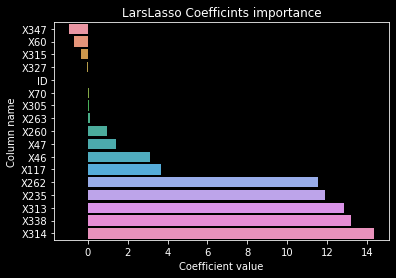

In [0]:
coef_ = [i for i in sorted(zip(Lasso_model.coef_,train.columns), key = lambda x : x[0]) if i[0]!=0.0]
sns.barplot([i[0] for i in coef_], [i[1] for i in coef_])
plt.title("LarsLasso Coefficints importance")
plt.xlabel("Coefficient value")
plt.ylabel("Column name")
plt.show()


<h4>5.1.2 XGBOOST (IN XGBOOST WE WILL BE USING DECOMPOSED+ORIGINAL FEATURES)</h4>

In [0]:
'''Cross validation the xgb model then predict the test data'''
xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(decomposed_train, actual_y)
dtest = xgb.DMatrix(decomposed_test)

# NOTE: Make sure that the class is labeled 'class' in the data file
num_boost_rounds = 2000

XGBOOST_CV = xgb.cv(xgb_params, dtrain, nfold=3, verbose_eval=3, num_boost_round=num_boost_rounds)
#from hyper parameter tuning we conclude that no of booster should be 
# 1250 as test RMSE started increasing after boosting round 1250
# [1248]	train-rmse:6.88919+0.0767487	test-rmse:7.98536+0.149503
# [1250]	train-rmse:6.8873+0.0766052	test-rmse:7.98538+0.149428

[0]	train-rmse:100.455+0.225998	test-rmse:100.454+0.450387
[3]	train-rmse:99.1162+0.222998	test-rmse:99.1155+0.440682
[6]	train-rmse:97.7951+0.219616	test-rmse:97.7945+0.43152
[9]	train-rmse:96.4918+0.216591	test-rmse:96.4912+0.422161
[12]	train-rmse:95.206+0.213431	test-rmse:95.2055+0.413165
[15]	train-rmse:93.9378+0.210543	test-rmse:93.9373+0.403988
[18]	train-rmse:92.6869+0.207905	test-rmse:92.6864+0.39476
[21]	train-rmse:91.4526+0.204843	test-rmse:91.4522+0.386078
[24]	train-rmse:90.2352+0.202156	test-rmse:90.2347+0.377158
[27]	train-rmse:89.0344+0.199538	test-rmse:89.034+0.368355
[30]	train-rmse:87.8497+0.196545	test-rmse:87.8494+0.36006
[33]	train-rmse:86.6812+0.193666	test-rmse:86.681+0.351816
[36]	train-rmse:85.5284+0.190886	test-rmse:85.5281+0.343606
[39]	train-rmse:84.3907+0.187958	test-rmse:84.3904+0.33567
[42]	train-rmse:83.269+0.185056	test-rmse:83.2688+0.327865
[45]	train-rmse:82.1625+0.182636	test-rmse:82.1623+0.319698
[48]	train-rmse:81.0707+0.179944	test-rmse:81.0706+0

[402]	train-rmse:18.1762+0.0103285	test-rmse:18.2346+0.162723
[405]	train-rmse:17.9766+0.0101904	test-rmse:18.037+0.164079
[408]	train-rmse:17.7797+0.0100197	test-rmse:17.8424+0.165695
[411]	train-rmse:17.5857+0.00989073	test-rmse:17.6509+0.16695
[414]	train-rmse:17.395+0.0099342	test-rmse:17.4624+0.168748
[417]	train-rmse:17.2073+0.0101588	test-rmse:17.277+0.170261
[420]	train-rmse:17.0226+0.0100044	test-rmse:17.0945+0.171736
[423]	train-rmse:16.8409+0.0100398	test-rmse:16.9152+0.172738
[426]	train-rmse:16.662+0.0101886	test-rmse:16.7389+0.173972
[429]	train-rmse:16.4862+0.0104416	test-rmse:16.5661+0.175022
[432]	train-rmse:16.3127+0.0105725	test-rmse:16.3955+0.177044
[435]	train-rmse:16.1421+0.0111222	test-rmse:16.2276+0.17795
[438]	train-rmse:15.9743+0.0112454	test-rmse:16.0626+0.179279
[441]	train-rmse:15.8096+0.0118518	test-rmse:15.9007+0.180557
[444]	train-rmse:15.6473+0.0124064	test-rmse:15.7412+0.181698
[447]	train-rmse:15.4877+0.0127574	test-rmse:15.585+0.183034
[450]	train-rm

[804]	train-rmse:7.77193+0.0646531	test-rmse:8.39097+0.181792
[807]	train-rmse:7.75627+0.0657134	test-rmse:8.37936+0.181267
[810]	train-rmse:7.74092+0.0657696	test-rmse:8.3682+0.180674
[813]	train-rmse:7.72591+0.0665856	test-rmse:8.35733+0.180135
[816]	train-rmse:7.71138+0.0666586	test-rmse:8.34687+0.179755
[819]	train-rmse:7.69595+0.0667314	test-rmse:8.3367+0.179045
[822]	train-rmse:7.68098+0.0665048	test-rmse:8.32614+0.178585
[825]	train-rmse:7.66784+0.0664111	test-rmse:8.31672+0.178028
[828]	train-rmse:7.65497+0.0668295	test-rmse:8.30745+0.177624
[831]	train-rmse:7.64173+0.0675596	test-rmse:8.298+0.17693
[834]	train-rmse:7.62844+0.0680735	test-rmse:8.28875+0.176686
[837]	train-rmse:7.61565+0.0682228	test-rmse:8.28+0.176381
[840]	train-rmse:7.60344+0.0683725	test-rmse:8.27155+0.175867
[843]	train-rmse:7.591+0.0688587	test-rmse:8.26305+0.175719
[846]	train-rmse:7.57858+0.0691478	test-rmse:8.25505+0.175569
[849]	train-rmse:7.56684+0.0688671	test-rmse:8.24696+0.175503
[852]	train-rmse:7

[1203]	train-rmse:6.92911+0.0746858	test-rmse:7.98706+0.151363
[1206]	train-rmse:6.92625+0.0750774	test-rmse:7.98709+0.151022
[1209]	train-rmse:6.92336+0.0758649	test-rmse:7.98676+0.150996
[1212]	train-rmse:6.92059+0.0756962	test-rmse:7.98653+0.15111
[1215]	train-rmse:6.91797+0.0755894	test-rmse:7.98634+0.150814
[1218]	train-rmse:6.91579+0.0756378	test-rmse:7.98622+0.150767
[1221]	train-rmse:6.91262+0.0759178	test-rmse:7.98617+0.150459
[1224]	train-rmse:6.90991+0.0760071	test-rmse:7.98605+0.150432
[1227]	train-rmse:6.90743+0.0761462	test-rmse:7.98622+0.150142
[1230]	train-rmse:6.90454+0.0760144	test-rmse:7.98598+0.149945
[1233]	train-rmse:6.90185+0.0763815	test-rmse:7.98604+0.149785
[1236]	train-rmse:6.8998+0.0766295	test-rmse:7.98598+0.149518
[1239]	train-rmse:6.89734+0.07645	test-rmse:7.98591+0.149398
[1242]	train-rmse:6.89469+0.0763246	test-rmse:7.98584+0.149495
[1245]	train-rmse:6.89181+0.0763887	test-rmse:7.98557+0.149855
[1248]	train-rmse:6.88919+0.0767487	test-rmse:7.98536+0.149

[1596]	train-rmse:6.61457+0.0753822	test-rmse:8.00124+0.15085
[1599]	train-rmse:6.61264+0.0754765	test-rmse:8.00166+0.150688
[1602]	train-rmse:6.61023+0.07557	test-rmse:8.00183+0.150691
[1605]	train-rmse:6.60845+0.0760919	test-rmse:8.00186+0.150584
[1608]	train-rmse:6.60583+0.0757618	test-rmse:8.00233+0.150769
[1611]	train-rmse:6.60386+0.0761385	test-rmse:8.00267+0.150791
[1614]	train-rmse:6.60144+0.0762074	test-rmse:8.00263+0.150655
[1617]	train-rmse:6.59962+0.0762906	test-rmse:8.00273+0.150942
[1620]	train-rmse:6.59733+0.0758752	test-rmse:8.00298+0.150881
[1623]	train-rmse:6.59549+0.0756524	test-rmse:8.00299+0.151035
[1626]	train-rmse:6.59358+0.075371	test-rmse:8.00295+0.150983
[1629]	train-rmse:6.59144+0.0756532	test-rmse:8.00335+0.151132
[1632]	train-rmse:6.58931+0.0761379	test-rmse:8.00366+0.151171
[1635]	train-rmse:6.5873+0.0760551	test-rmse:8.00381+0.151224
[1638]	train-rmse:6.58539+0.0764149	test-rmse:8.00388+0.151452
[1641]	train-rmse:6.58322+0.076694	test-rmse:8.00391+0.15140

[1992]	train-rmse:6.34223+0.0742712	test-rmse:8.02152+0.155681
[1995]	train-rmse:6.34041+0.074582	test-rmse:8.02164+0.155617
[1998]	train-rmse:6.33876+0.0748362	test-rmse:8.02185+0.155612
[1999]	train-rmse:6.33813+0.0747903	test-rmse:8.02194+0.155833


In [0]:
'''Train the xgb model then predict the test data'''

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}


dtrain = xgb.DMatrix(decomposed_train, actual_y)
dtest = xgb.DMatrix(decomposed_test)

# NOTE: Make sure that the class is labeled 'class' in the data file
num_boost_rounds = 1250
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
y_pred_train = model.predict(dtrain)
y_pred = model.predict(dtest)
print(f"(r2  : {r2_score(actual_y,y_pred_train)} and mean_squared_error {mean_squared_error(actual_y,y_pred_train,squared=False)})  ")

[03:14:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(r2  : 0.6707776090244431 and mean_squared_error 7.131751518080556)  


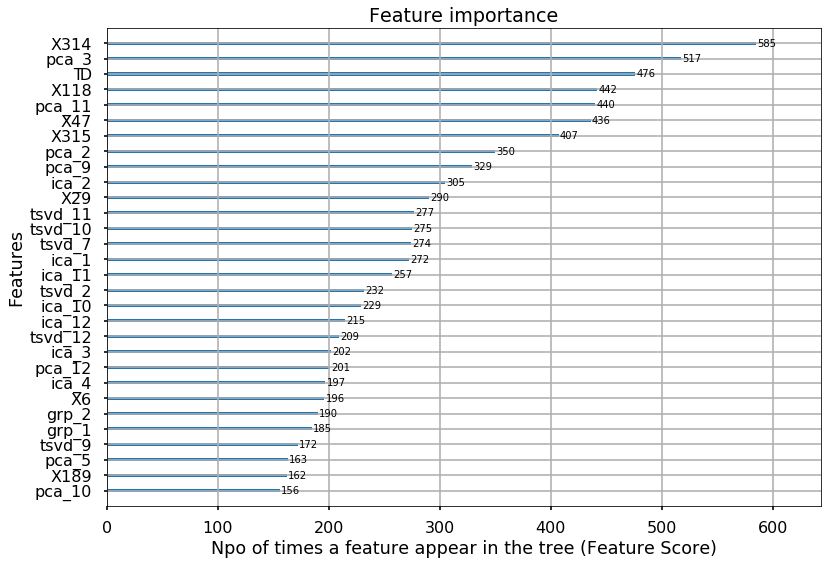

In [0]:
xgb.plot_importance(model,max_num_features=30,xlabel = "Npo of times a feature appear in the tree (Feature Score)")
plt.show()

<h4>5.1.3 Gradient Boosting Regressor</h4>

In [0]:
GBDT_params = {
    'learning_rate': [.00045,.0045,.001,.0025,.007,.001,.02,.01],
    'max_depth': [2,3,4,5,6,7,8,9],
    'max_features': [.2,.3,.4,.5,.55,.7,.9],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'subsample': [.1,.2,.4,.5,.6]   
}
    


GBDT_clf = GradientBoostingRegressor()


GBDT_clf = RandomizedSearchCV(GBDT_clf, GBDT_params, n_iter=30,
                            n_jobs=-1, verbose=2, cv= 5,
                            scoring='r2', random_state=42,return_train_score=True)

GBDT_clf.fit(train,actual_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [0]:
count = 0
test_result = GBDT_clf.cv_results_["mean_test_score"]
train_result = GBDT_clf.cv_results_["mean_train_score"]
for i in GBDT_clf.cv_results_['params']:
    print(f"params : {i} and it's test r2 score is {test_result[count]} and it's train r2 score is {train_result[count]}")
    count+=1

params : {'subsample': 0.5, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 0.3, 'max_depth': 2, 'learning_rate': 0.007} and it's test r2 score is 0.17496407650966447 and it's train r2 score is 0.1902027532254344
params : {'subsample': 0.4, 'min_samples_split': 8, 'min_samples_leaf': 20, 'max_features': 0.7, 'max_depth': 8, 'learning_rate': 0.007} and it's test r2 score is 0.3616959090205315 and it's train r2 score is 0.4298460216167509
params : {'subsample': 0.4, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 0.9, 'max_depth': 4, 'learning_rate': 0.007} and it's test r2 score is 0.313172488477965 and it's train r2 score is 0.3443383036030797
params : {'subsample': 0.6, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 5, 'learning_rate': 0.0025} and it's test r2 score is 0.15724511943619174 and it's train r2 score is 0.185908248841187
params : {'subsample': 0.6, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_feature

In [0]:
GBDT_clf.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=0.9, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.4, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
best_score = GBDT_clf.best_score_
best_params = GBDT_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))
    
GBDT_model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=0.9, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.4, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
GBDT_model.fit(train,actual_y)
predicted_y = GBDT_model.predict(train)
print(f"GBDT best model result : {r2_score(actual_y,predicted_y)}") 

Best score: 0.5017089894239255
Best params: 
learning_rate: 0.02
max_depth: 8
max_features: 0.9
min_samples_leaf: 20
min_samples_split: 9
subsample: 0.4
GBDT best model result : 0.6468096267163097


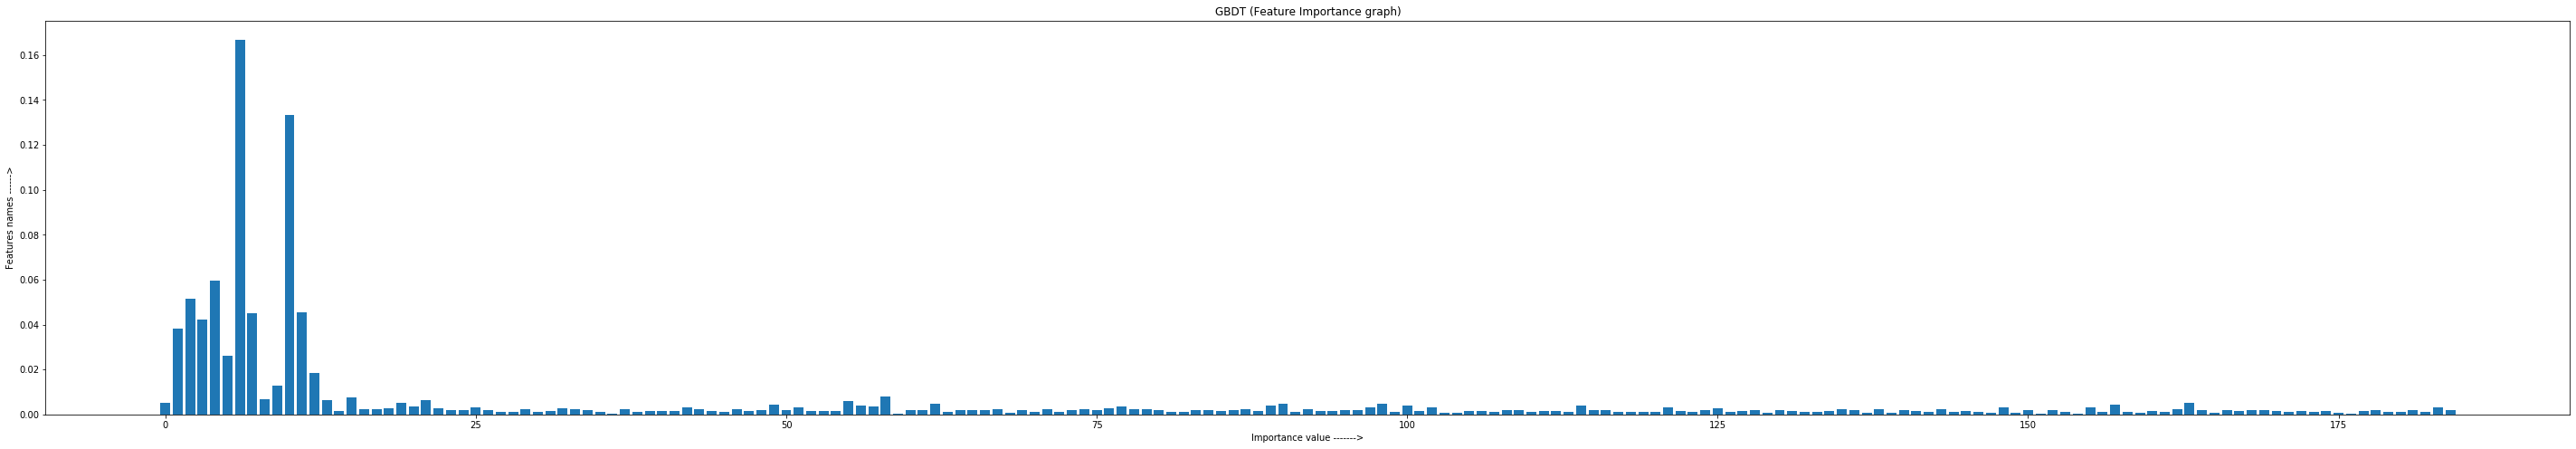

GBDT Features : [154, 36, 151, 59, 176, 104, 129, 165, 139, 103, 159, 149, 147, 68, 137, 175, 142, 38, 117, 118, 153, 171, 133, 99, 45, 156, 180, 27, 119, 30, 63, 107, 70, 126, 81, 132, 146, 161, 82, 35, 123, 173, 179, 28, 91, 120, 72, 182, 158, 110, 144, 113, 112, 160, 101, 54, 167, 111, 172, 145, 39, 85, 93, 105, 122, 141, 174, 40, 170, 134, 106, 44, 14, 94, 177, 52, 88, 127, 53, 41, 131, 47, 31, 96, 181, 86, 169, 75, 61, 83, 168, 115, 108, 80, 34, 164, 184, 65, 26, 150, 152, 66, 166, 128, 60, 84, 116, 23, 64, 24, 130, 48, 109, 73, 140, 69, 136, 178, 50, 95, 124, 29, 92, 74, 78, 67, 143, 43, 37, 162, 138, 71, 16, 17, 33, 46, 87, 135, 79, 22, 32, 76, 125, 18, 25, 183, 155, 42, 121, 97, 102, 148, 51, 20, 57, 77, 89, 114, 56, 100, 49, 157, 90, 62, 98, 163, 19, 0, 55, 13, 21, 8, 15, 58, 9, 12, 5, 1, 3, 7, 11, 2, 4, 10, 6]


In [0]:
zipped = zip(train.columns.to_list(),list(GBDT_model.feature_importances_))
# Using sorted and lambda 
res = sorted(zipped, key = lambda x: x[1]) 
res_GBDT= []
for i in res:
    if(i[1] > 0 or i[1] < 0):
        res_GBDT.append(i)
plt.figure(figsize=(50,8))
plt.title("GBDT (Feature Importance graph)")
plt.bar([i[0] for i in res],[i[1] for i in res])
plt.xlabel("Importance value ------->")
plt.ylabel("Features names ------>")
plt.show()

print(f"GBDT Features : {[i[0] for i in res_GBDT] }" )

<h4>5.3. Stacking Models</h4>

In [0]:
class StackingEstimator(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator):
        self.estimator = estimator

    
    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self
    
    def transform(self, X):
        X = check_array(X)
        X_transformed = np.copy(X)
        # add class probabilities as a synthetic feature
        if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
            X_transformed = np.hstack((self.estimator.predict_proba(X), X))
        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))
        return X_transformed

In [0]:
# Using the stacking techniques to provide robustness to the model
stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(fit_intercept=True, verbose=True, max_iter=500, normalize=True, precompute='auto',\
                        cv=5, max_n_alphas=1000, n_jobs=None, eps=2.220446049250313e-16, copy_X=True, positive=False)),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=0.9, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.4, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)),
    LassoLarsCV(fit_intercept=True, verbose=True, max_iter=500, normalize=True, precompute='auto',\
                        cv=5, max_n_alphas=1000, n_jobs=None, eps=2.220446049250313e-16, copy_X=True, positive=False)
)

stacked_pipeline.fit(train, actual_y)
results = stacked_pipeline.predict(test)

'''R2 Score on the entire Train data when averaging'''

alpha = [.1,.2,.3,.4,.5,.56,.59,.6,.62,.65,.7,.8,.9]
for i in alpha:
    print(r2_score(actual_y,stacked_pipeline.predict(train)*i + model.predict(dtrain)*(1-i)))
    
'''Average the preditionon test data  of both models then save it on a csv file'''

sub = pd.DataFrame()
i = .62
sub['ID'] = test['ID']
sub['y'] = y_pred*(1-i) + results*i
sub.to_csv('submission_Final.csv', index=False)
#.40 _ .60 is giving .54971 with labelEncoder with clipping at 150 without sequencing
#.38 _ .62 is giving .55103 with labelEncoder with clipping at 180 without sequencing
#.38 _ .625 is giving .55179 with labelEncoder with clipping at 130 without sequencing
#i = .62 is giving .55238 with labelEncoder with clipping at 130 without sequencing

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


0.6695469799872598
0.6680660194351926
0.6663346646248745
0.6643529617541866
0.6621208735328352
0.6606614488105177
0.659897935272171
0.6596384286723077
0.6591118899742947
0.6583033167592671
0.6569056170769898
0.6539224364660405
0.6506888911567007


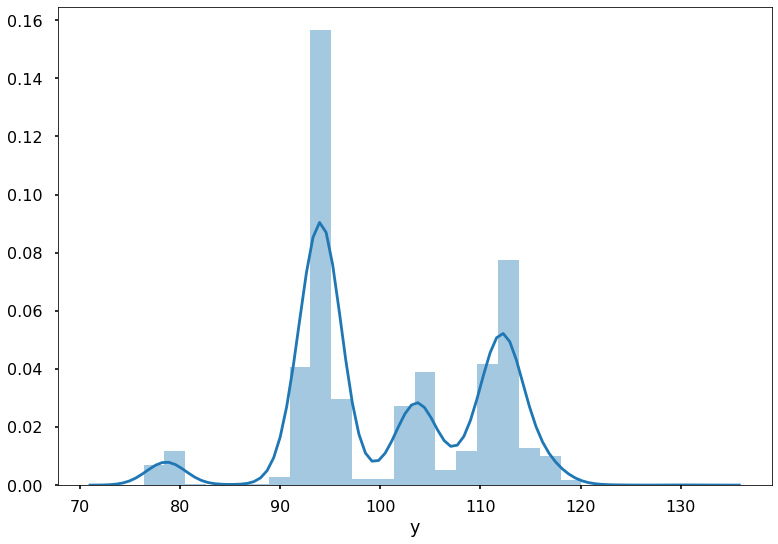

In [0]:
sns.distplot(sub['y'])

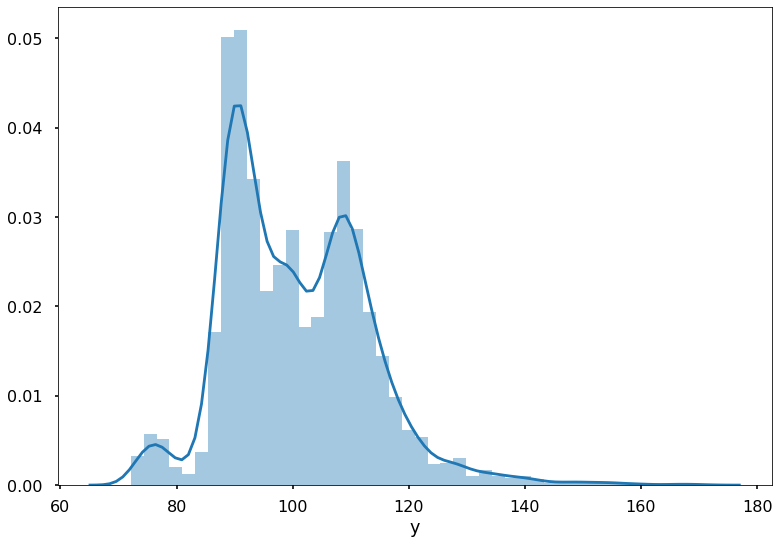

In [0]:
sns.distplot(actual_y)

<h3>7.Deep Learning Model Architecture</h3>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend
import os

input_dim = 437
output_dim = 1
batch_size = 5
epochs = 50
model_adam = Sequential()

model_adam.add(Dense(500, activation='relu', input_shape=(input_dim,)))

model_adam.add(Dropout(0.2))

model_adam.add(Dense(450, activation='relu'))

model_adam.add(Dropout(0.5))

model_adam.add(Dense(300, activation='relu'))

model_adam.add(Dropout(0.5))

model_adam.add(Dense(100, activation='relu'))

model_adam.add(Dense(10, activation='relu'))

model_adam.add(Dense(output_dim))

In [55]:
model_adam.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               219000    
_________________________________________________________________
dropout_22 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 450)               225450    
_________________________________________________________________
dropout_23 (Dropout)         (None, 450)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 300)               135300    
_________________________________________________________________
dropout_24 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)              

In [0]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
 
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

def r2_keras(y_true, y_pred):
    SS_res =  backend.sum(backend.square(y_true - y_pred)) 
    SS_tot = backend.sum(backend.square(y_true - backend.mean(y_true))) 
    return -( 1 - SS_res/(SS_tot) )
  

    

In [56]:
model_adam.compile(optimizer='adam', loss=[r2_keras], metrics=[rmse,r2_keras])

checkpoint_path = "/content/gdrive/My Drive/SelfCaseStudy/train/attempt_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create checkpoint callback
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path,save_best_only=True,\
                                                  save_weights_only=False ,monitor='val_r2_keras',mode= "max",\
                                                  verbose=1)


model = model_adam.fit(decomposed_train, actual_y, batch_size=batch_size , verbose = 2, epochs=300,callbacks=[cp_callback], validation_split=0.2)

Train on 3367 samples, validate on 842 samples
Epoch 1/300

Epoch 00001: val_r2_keras improved from -inf to -3.89222, saving model to /content/gdrive/My Drive/SelfCaseStudy/train/attempt_1/cp.ckpt
3367/3367 - 5s - loss: 35.3902 - rmse: 35.3902 - r2_keras: -5.5299e+01 - val_loss: 15.5164 - val_rmse: 15.5164 - val_r2_keras: -3.8922e+00
Epoch 2/300

Epoch 00002: val_r2_keras did not improve from -3.89222
3367/3367 - 3s - loss: 18.5720 - rmse: 18.5720 - r2_keras: -7.3997e+00 - val_loss: 25.9530 - val_rmse: 25.9530 - val_r2_keras: -1.1422e+01
Epoch 3/300

Epoch 00003: val_r2_keras improved from -3.89222 to -1.59816, saving model to /content/gdrive/My Drive/SelfCaseStudy/train/attempt_1/cp.ckpt
3367/3367 - 2s - loss: 18.2641 - rmse: 18.2641 - r2_keras: -1.1674e+01 - val_loss: 10.0039 - val_rmse: 10.0039 - val_r2_keras: -1.5982e+00
Epoch 4/300

Epoch 00004: val_r2_keras did not improve from -1.59816
3367/3367 - 3s - loss: 17.1177 - rmse: 17.1177 - r2_keras: -6.5093e+00 - val_loss: 20.7584 - v

Train RMSE: 9.249127602118385


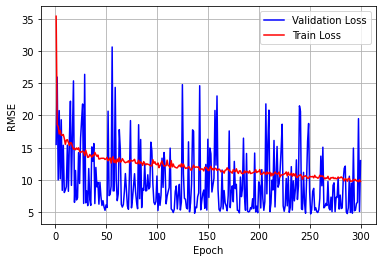

In [57]:
score = model_adam.evaluate(decomposed_train, actual_y, verbose=0) 
print('Train RMSE:', score[0]) 

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE')
x = list(range(1,300+1))

vy = model.history['val_loss']
ty = model.history['loss']
plt_dynamic(x, vy, ty, ax)

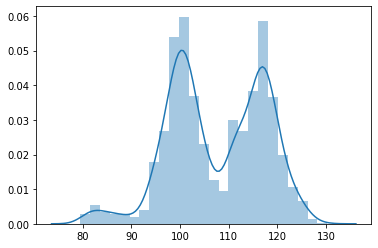

In [59]:
sns.distplot(model_adam.predict(decomposed_test))

In [0]:
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['y'] = model_adam.predict(decomposed_test)
sub.to_csv('/content/gdrive/My Drive/SelfCaseStudy/submission_Final.csv', index=False)